## The Lorenz attractor

In [2]:
%matplotlib notebook 
import numpy as np
from scipy import linalg
import scipy
import scipy.linalg
import matplotlib.pyplot as plt
from tabulate import tabulate
import sympy as sy
from mpl_toolkits.mplot3d import Axes3D

We want to solve the following problem:  
$$\dot{x} = -\sigma(x-y)$$
$$\dot{y} = rx-y-xz$$
$$\dot{z} = xy-bz$$  
  
Furthermore we are given some specific values: $\sigma = 10$ and $b = 8/3$. $r$ can be varied. In this excersise we will use the following values, as given on the homework sheet: r = 0.5, 1.17, 1.3456, 25.0 and 29.0.
  
We will solve this problem numerically with the (previously used) rk4 method.  
  
So rk4 will be implemented first:

In [4]:
def rk4_step(y0, x0, f, h, f_args = {}):
    k1 = h * f(y0, x0, **f_args)
    k2 = h * f(y0 + k1/2., x0 + h/2., **f_args)
    k3 = h * f(y0 + k2/2., x0 + h/2., **f_args)
    k4 = h * f(y0 + k3, x0 + h, **f_args)
    
    xp1 = x0 + h
    yp1 = y0 + 1./6.*(k1 + 2.*k2 + 2.*k3 + k4)
    
    return(yp1,xp1)

def rk4(y0, x0, f, h, n, f_args = {}):
    yn = np.zeros((n+1, y0.shape[0]))
    xn = np.zeros(n+1)
    yn[0,:] = y0
    xn[0] = x0
    
    for n in np.arange(1,n+1,1):
        yn[n,:], xn[n] = rk4_step(y0 = yn[n-1,:], x0 = xn[n-1], f = f, h = h, f_args = f_args)
        
    return(yn, xn)

The next step is to define a function that describes the lorenz attractor problem using the differential equations from above:

In [5]:
def func(vector, x0, r):
    dx =  -sig*(vector[0]-vector[1])
    dy = r*vector[0] - vector[1] - vector[0]*vector[2]
    dz = vector[0]*vector[1] - b*vector[2]
    return np.array([dx, dy, dz])

def start(r):
    if r<1:
        return np.array([0.1, 0.1, 0.1])
    else:
        a0 = np.sqrt(b*(r-1))
        return np.array([a0+0.1, a0+0.1, r-1+0.1])

Depending on whether r is bigger or smaller than 1 we get a different fixed point to observe, as discussed in the lecture.  
  
The function *start* checks r and sets the starting values close to either one of the fixed points.  
  
Firstly we plot the solution using r = 0.5.

<IPython.core.display.Javascript object>


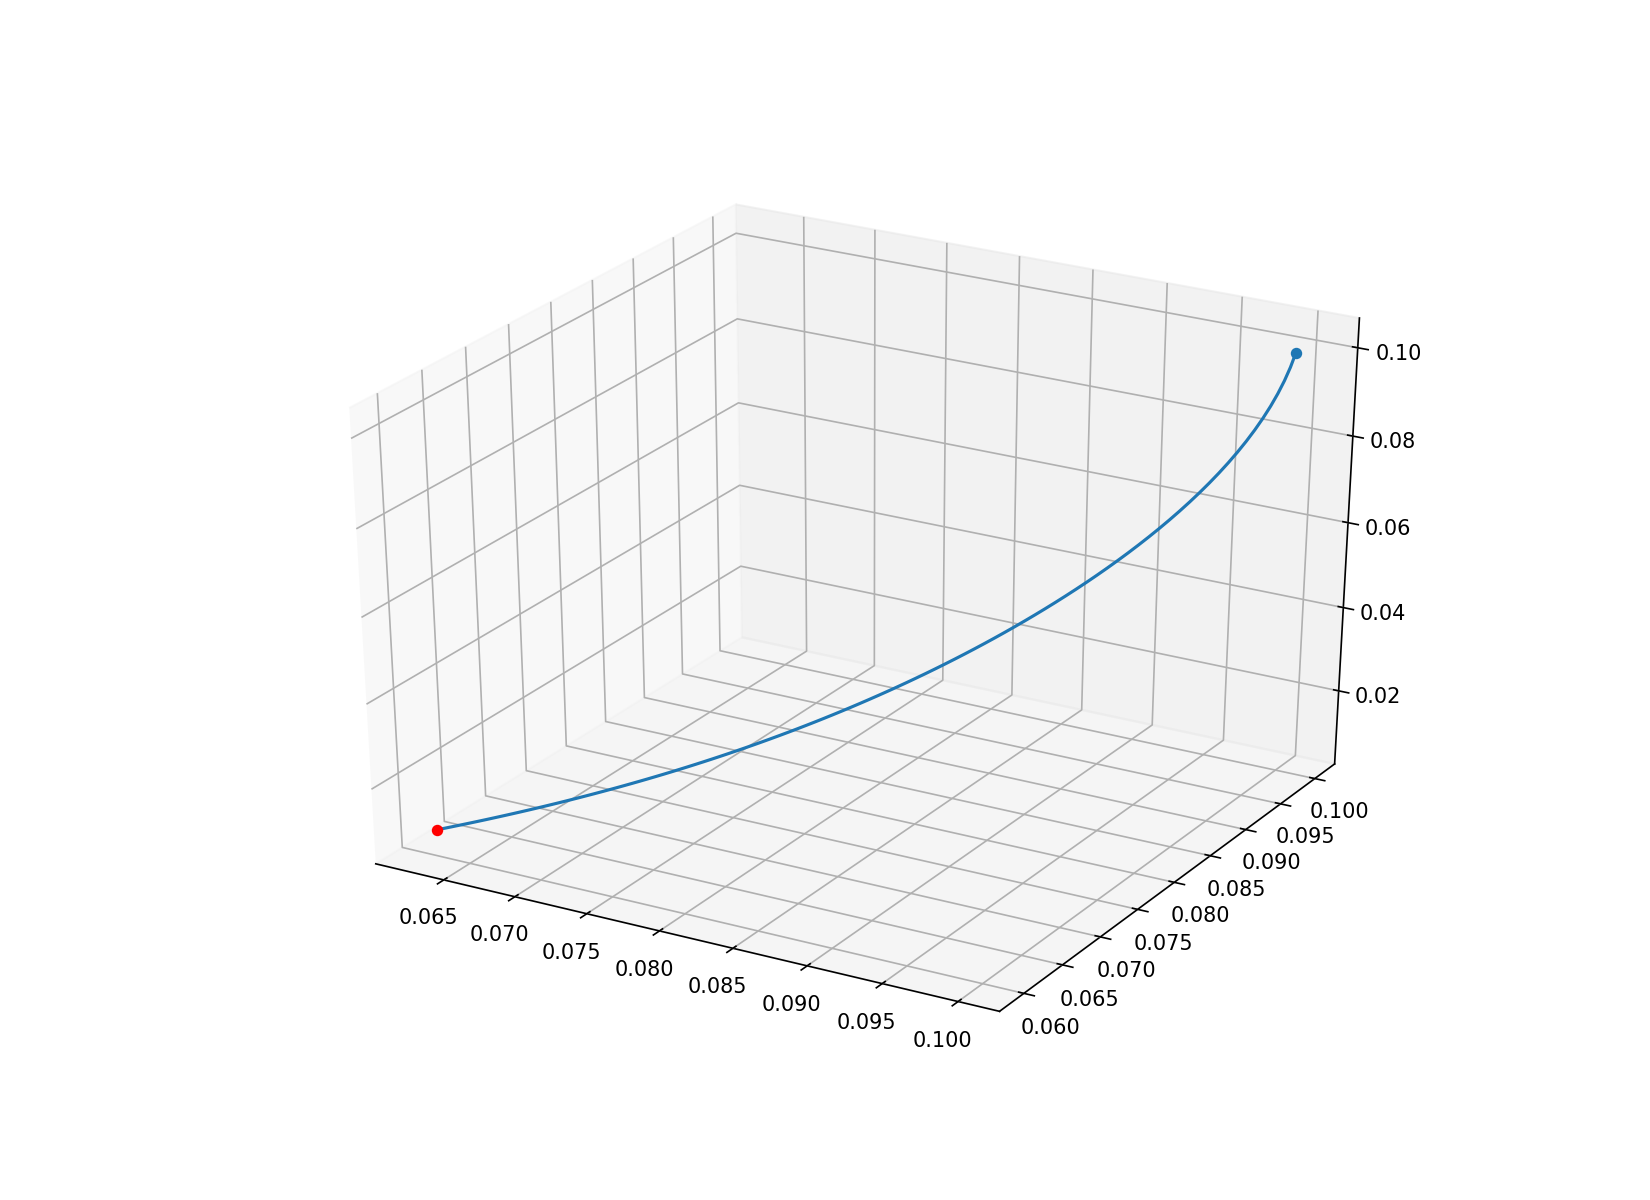

In [7]:
sig = 10
b = 8/3
h = 0.01 #step size
fig = plt.figure(figsize=(11,8))

r_s = np.array([0.5, 1.17, 1.3456, 25.0, 29.0]) #given values for r as on the homework sheet
steps = 100

y, x = rk4(start(r_s[0]), np.array([0]), func, h, steps, f_args={"r":r_s[0]})
ax=plt.subplot(projection="3d")
ax.plot(y[:,0], y[:,1], y[:,2])
ax.scatter(y[0][0], y[0][1], y[0][2])
ax.scatter(y[-1][0], y[-1][1], y[-1][2], color="red")

The following plot is a numerical solution for r = 1.17:

<IPython.core.display.Javascript object>


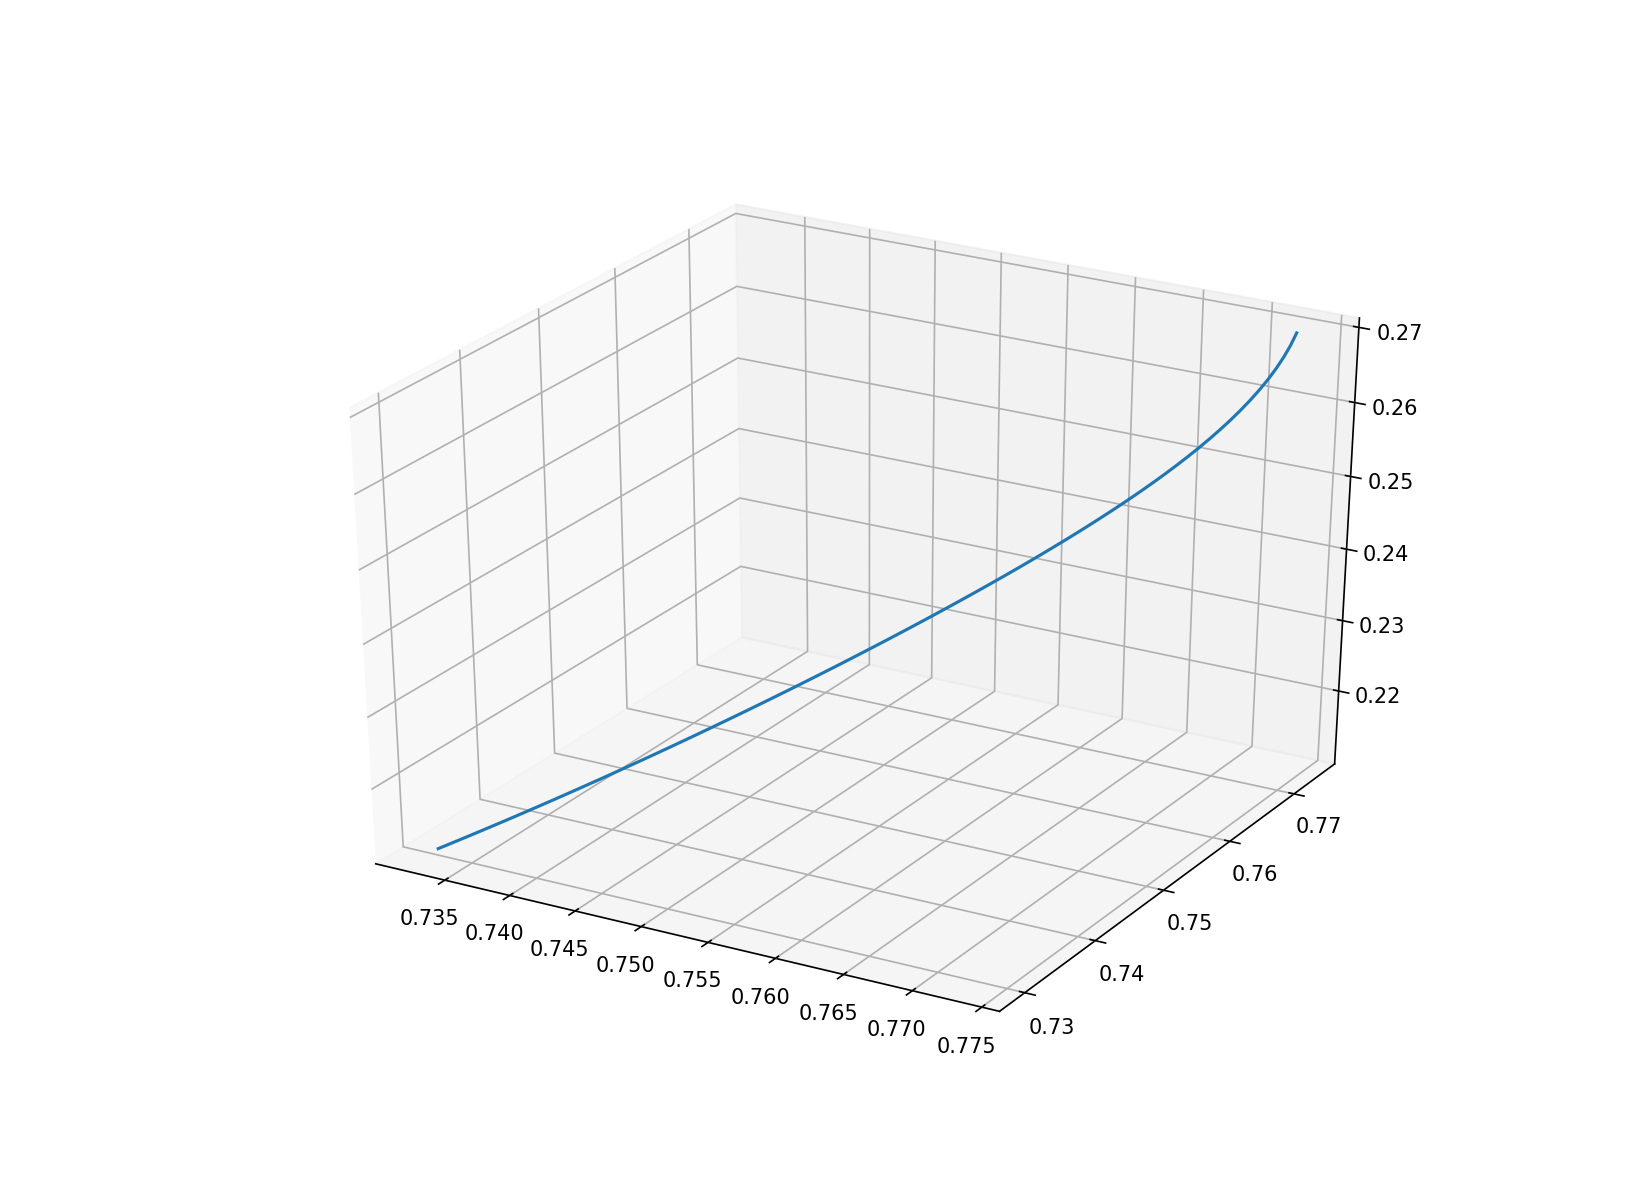

In [8]:
fig = plt.figure(figsize=(11,8))
y, x = rk4(start(r_s[1]), np.array([0]), func, h, 100, f_args={"r":r_s[1]})
ax=plt.subplot(projection="3d")
ax.plot(y[:,0], y[:,1], y[:,2])

This is followed up by the plot of r = 1.3456.

<IPython.core.display.Javascript object>


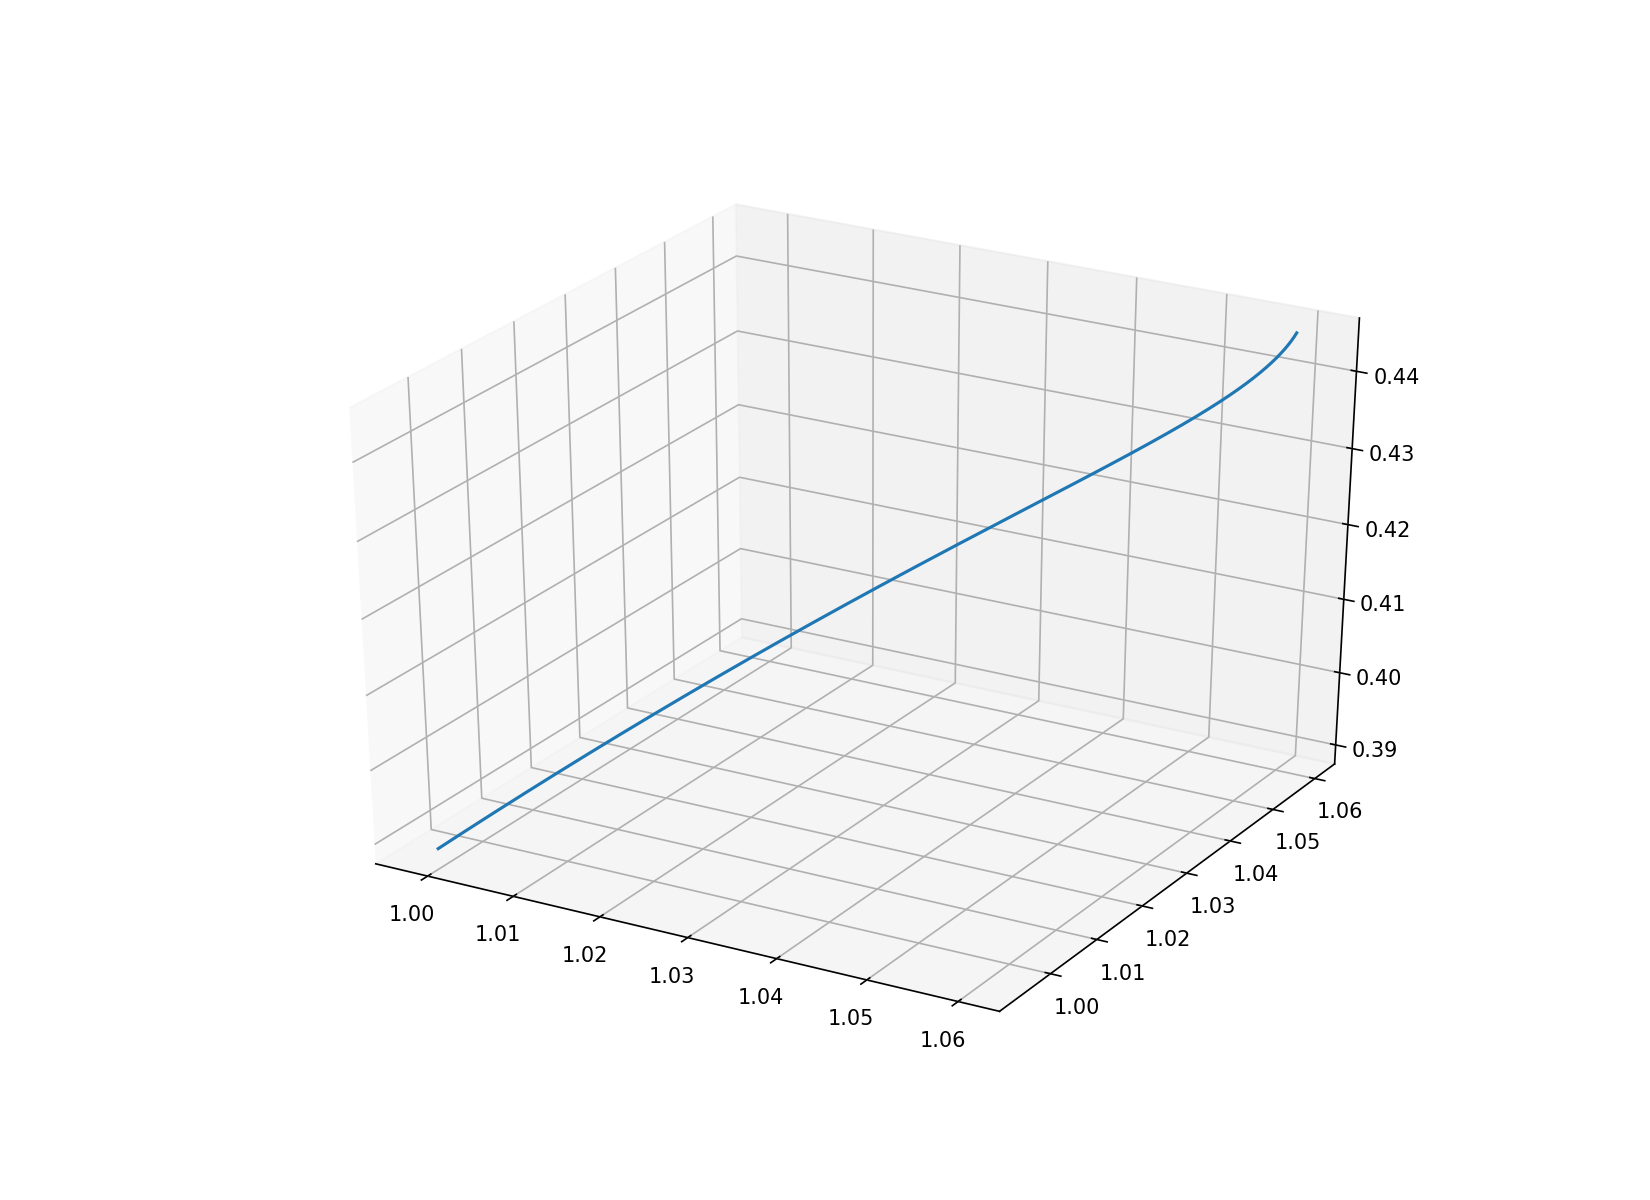

In [11]:
h = 0.001
fig = plt.figure(figsize=(11,8))
y, x = rk4(start(r_s[2]), np.array([0]), func, h, 1000, f_args={"r":r_s[2]})
ax=plt.subplot(projection="3d")
ax.plot(y[:,0], y[:,1], y[:,2])

We now set r to 25.0:

<IPython.core.display.Javascript object>


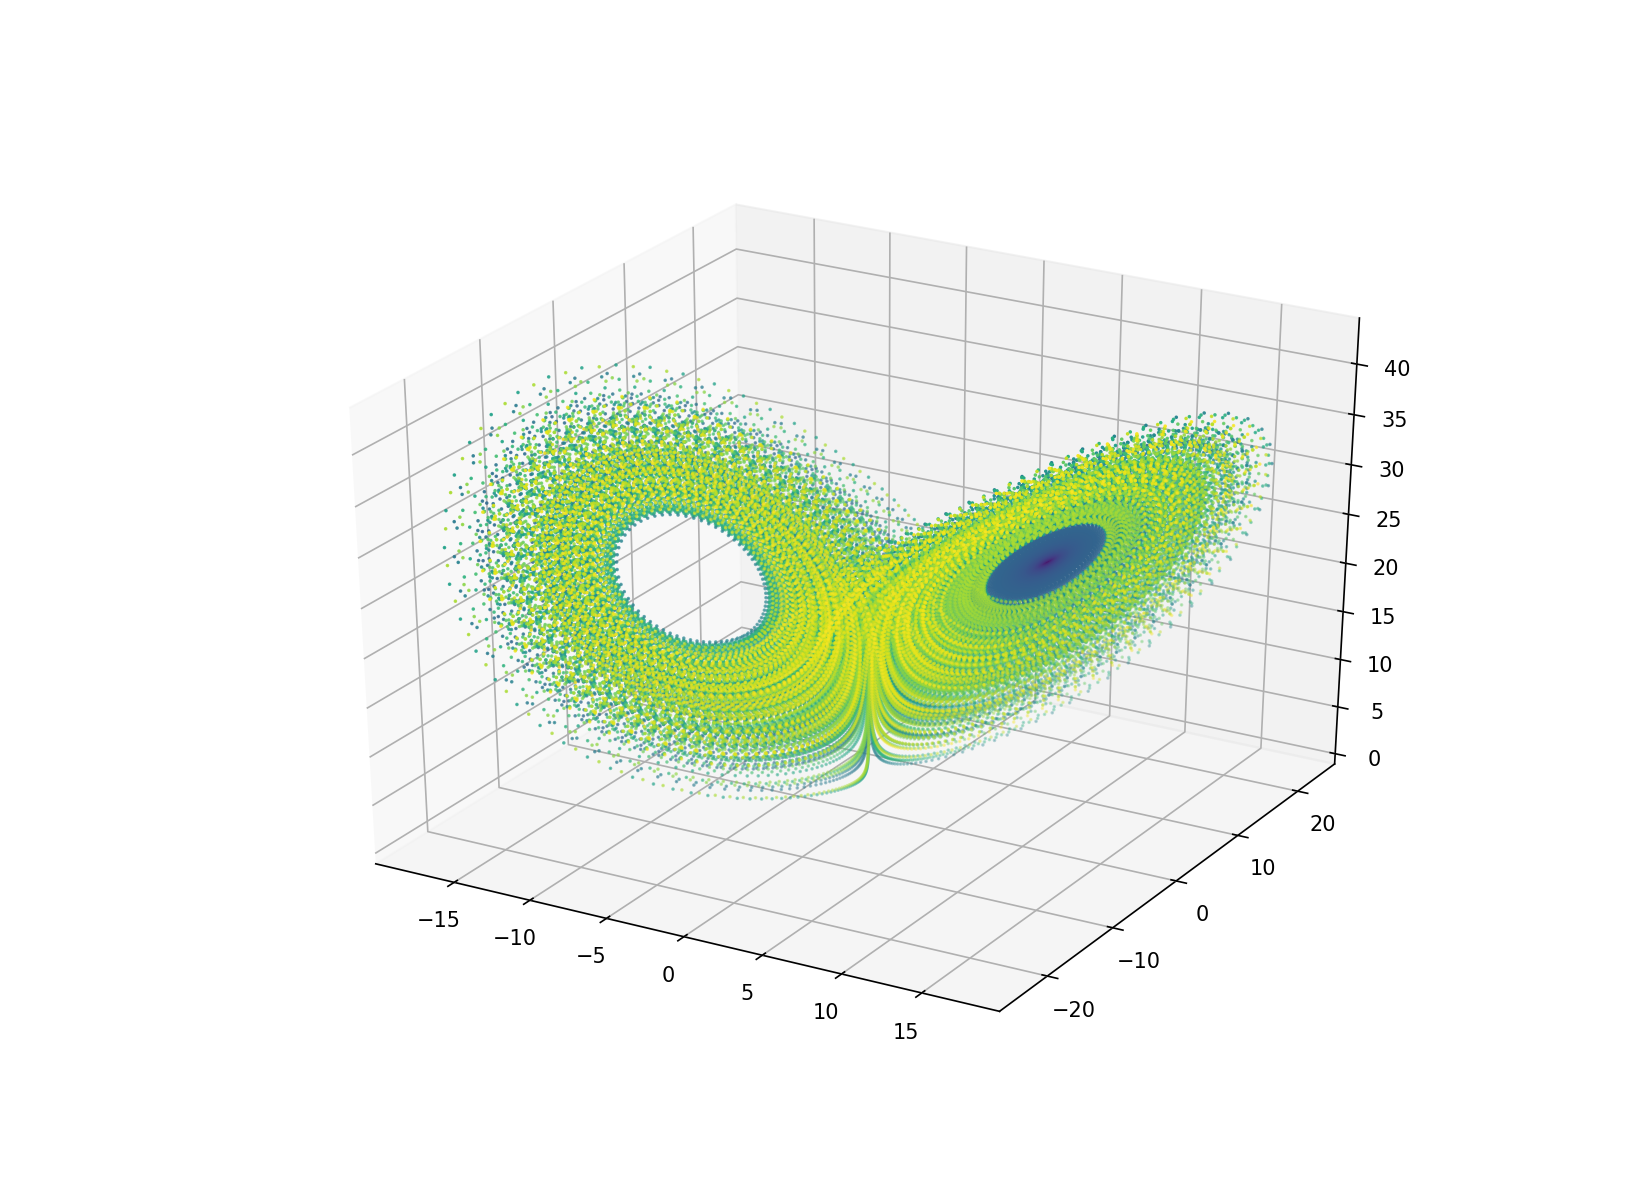

In [12]:
h = 0.01
fig = plt.figure(figsize=(11,8))
r_s = np.array([0.5, 1.17, 1.3456, 25.0, 29.0])
y, x = rk4(start(r_s[3]), np.array([0]), func, h, 100000, f_args={"r":r_s[3]})
ax=plt.subplot(projection="3d")
ax.scatter(y[:,0], y[:,1], y[:,2], c=x, s=0.5)

Or plotted differently (using plot instead of scatter)

<IPython.core.display.Javascript object>


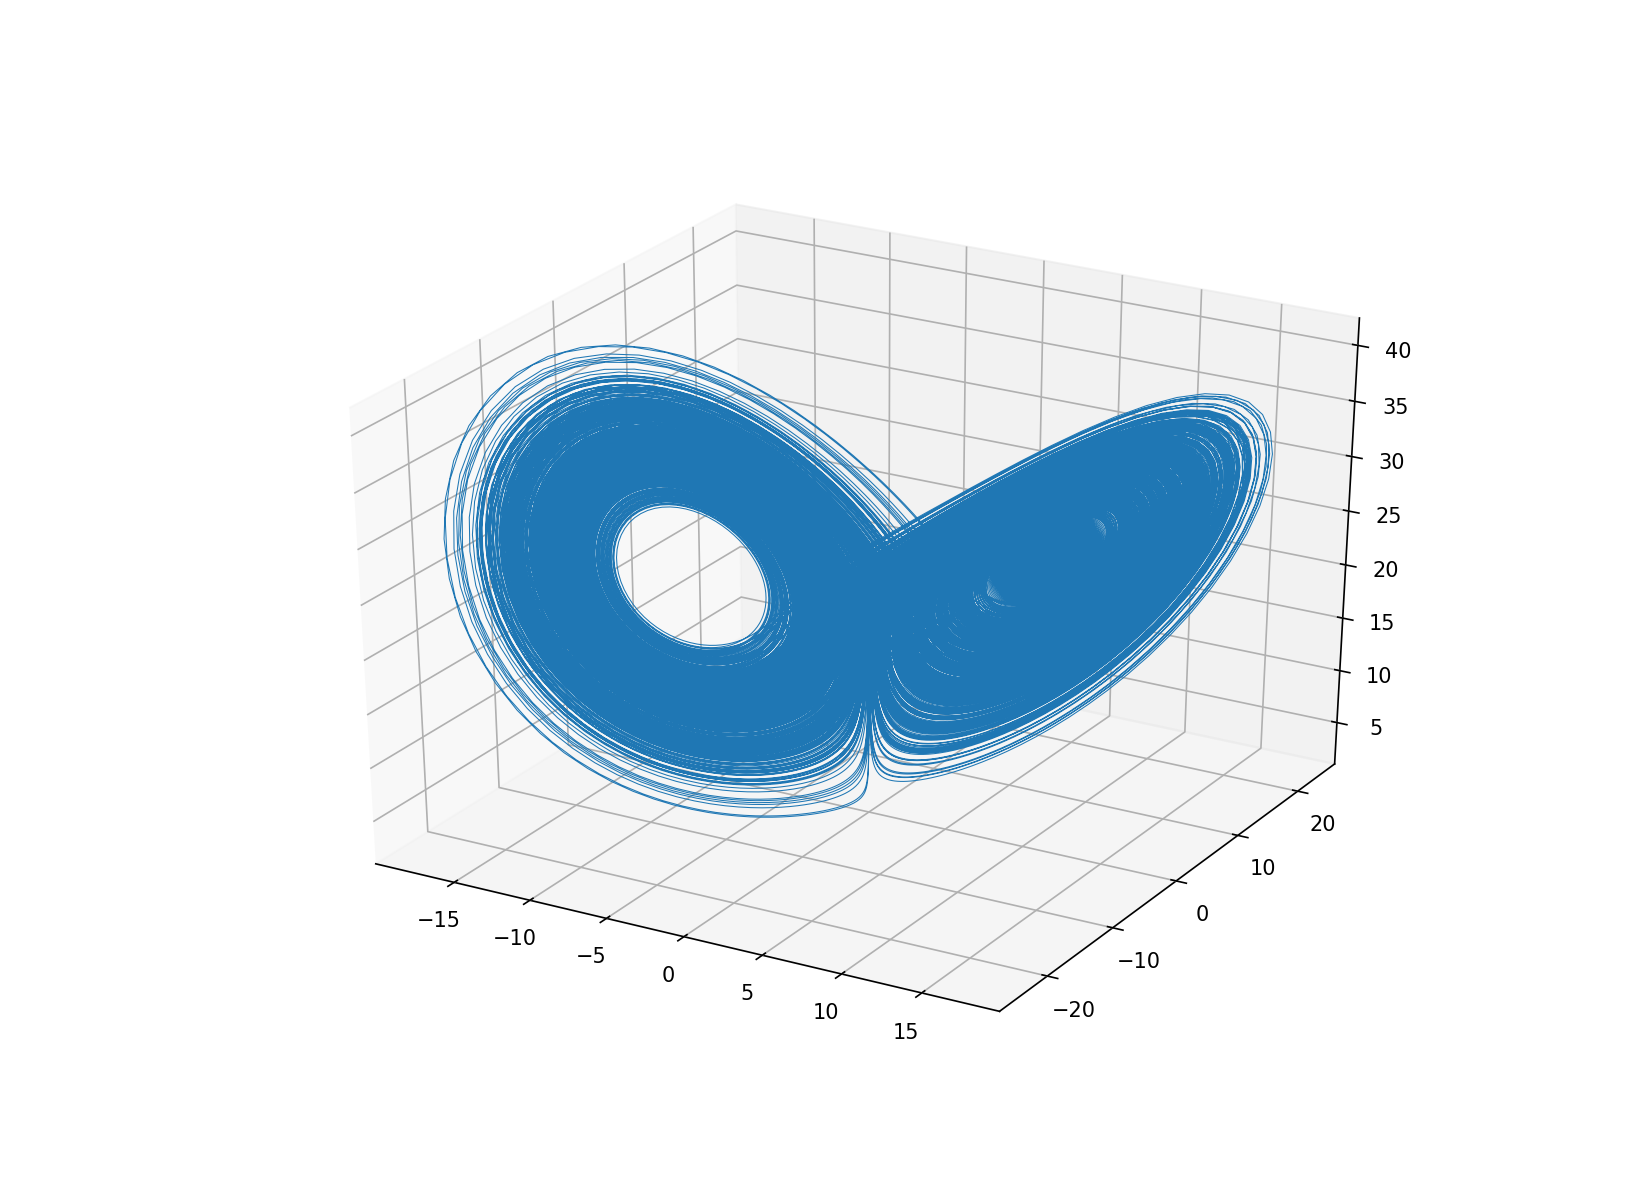

In [13]:
h = 0.01
fig = plt.figure(figsize=(11,8))
r_s = np.array([0.5, 1.17, 1.3456, 25.0, 29.0])
y, x = rk4(start(r_s[3]), np.array([0]), func, h, 100000, f_args={"r":r_s[3]})
ax=plt.subplot(projection="3d")
ax.plot(y[:,0], y[:,1], y[:,2], linewidth=0.5)

The problem has to be solved lastly for r = 29.0. The result can be seen below:

<IPython.core.display.Javascript object>


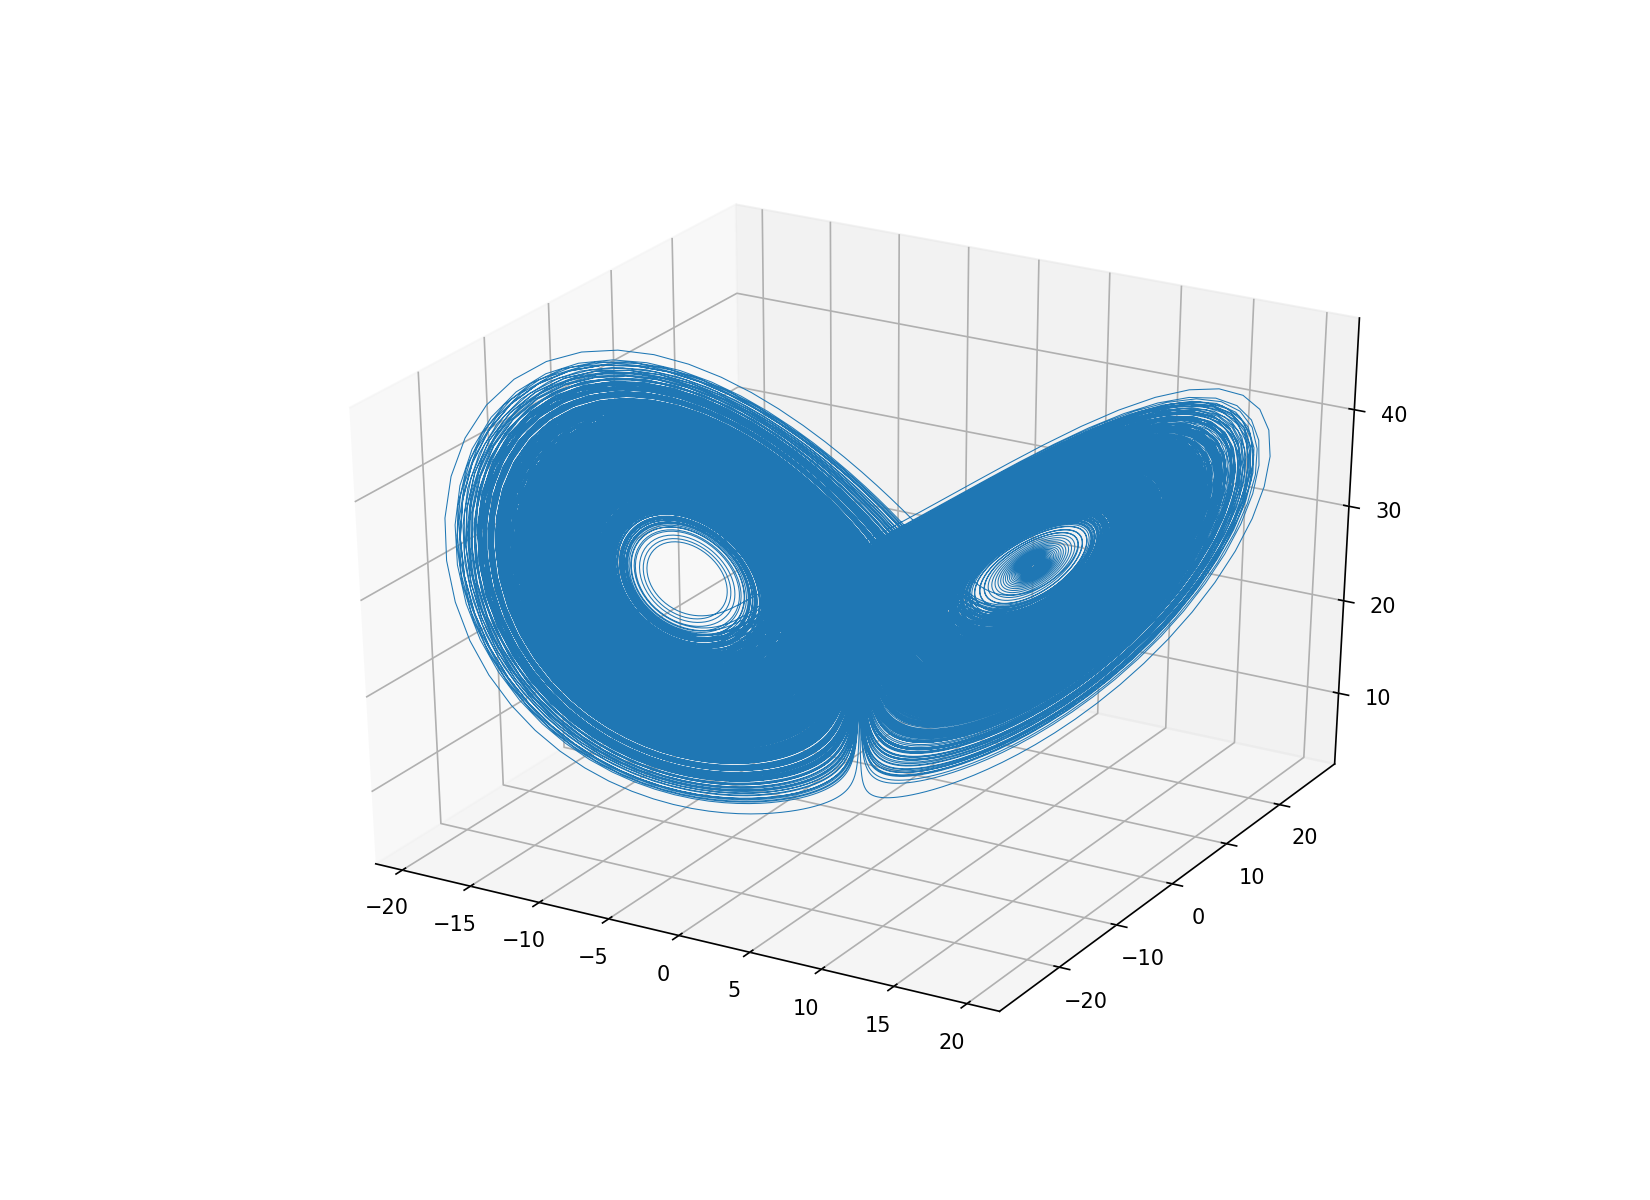

In [14]:
h = 0.01
fig = plt.figure(figsize=(11,8))
r_s = np.array([0.5, 1.17, 1.3456, 25.0, 29.0])
y, x = rk4(start(r_s[4]), np.array([0]), func, h, 100000, f_args={"r":r_s[4]})
ax=plt.subplot(projection="3d")
ax.plot(y[:,0], y[:,1], y[:,2], linewidth=0.5)

As we now is the step size relevant for the accuracy of the result. We will check that in the next plot.  
An increased step size leads to the following result

<IPython.core.display.Javascript object>


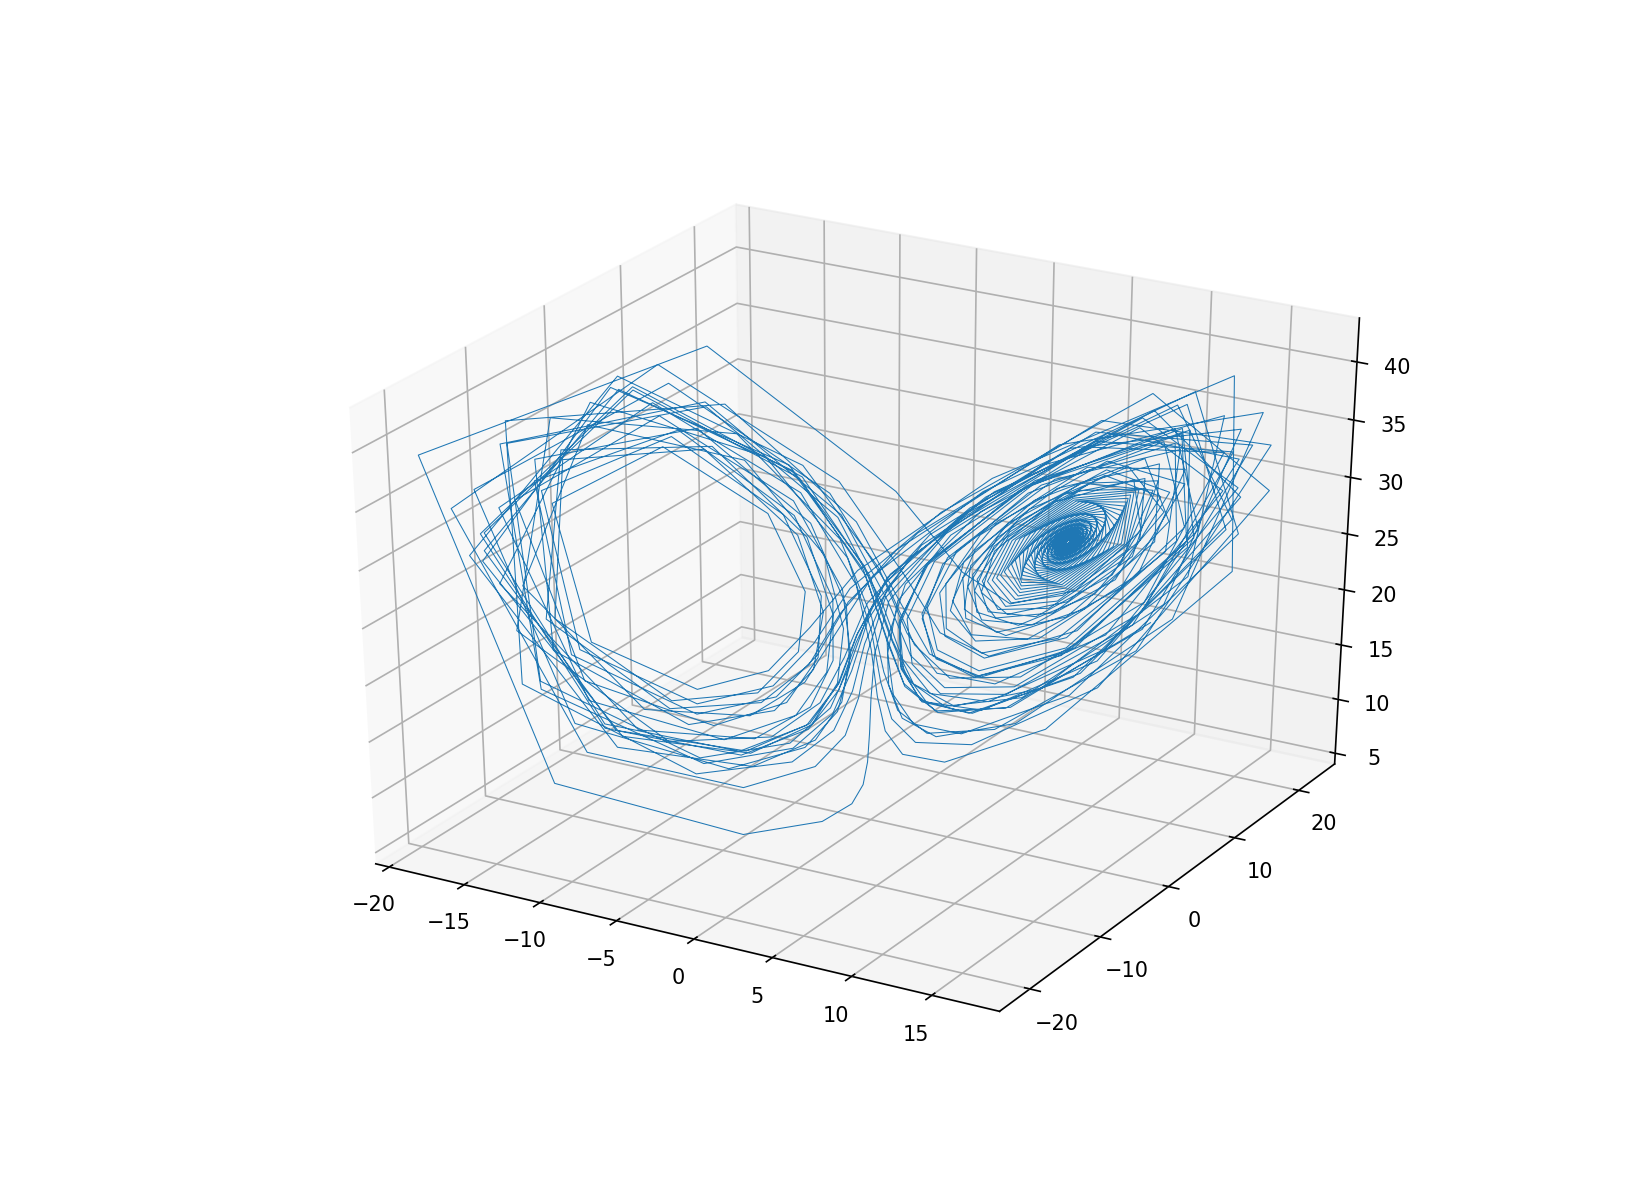

In [16]:
h = 0.09
fig = plt.figure(figsize=(11,8))
y, x = rk4(start(r_s[4]), np.array([0]), func, h, 1000, f_args={"r":r_s[4]})
ax=plt.subplot(projection="3d")
ax.plot(y[:,0], y[:,1], y[:,2], linewidth=0.5)

Ultimately we plot all of the different results as subplots next to each other to make the comparison easier:

<IPython.core.display.Javascript object>


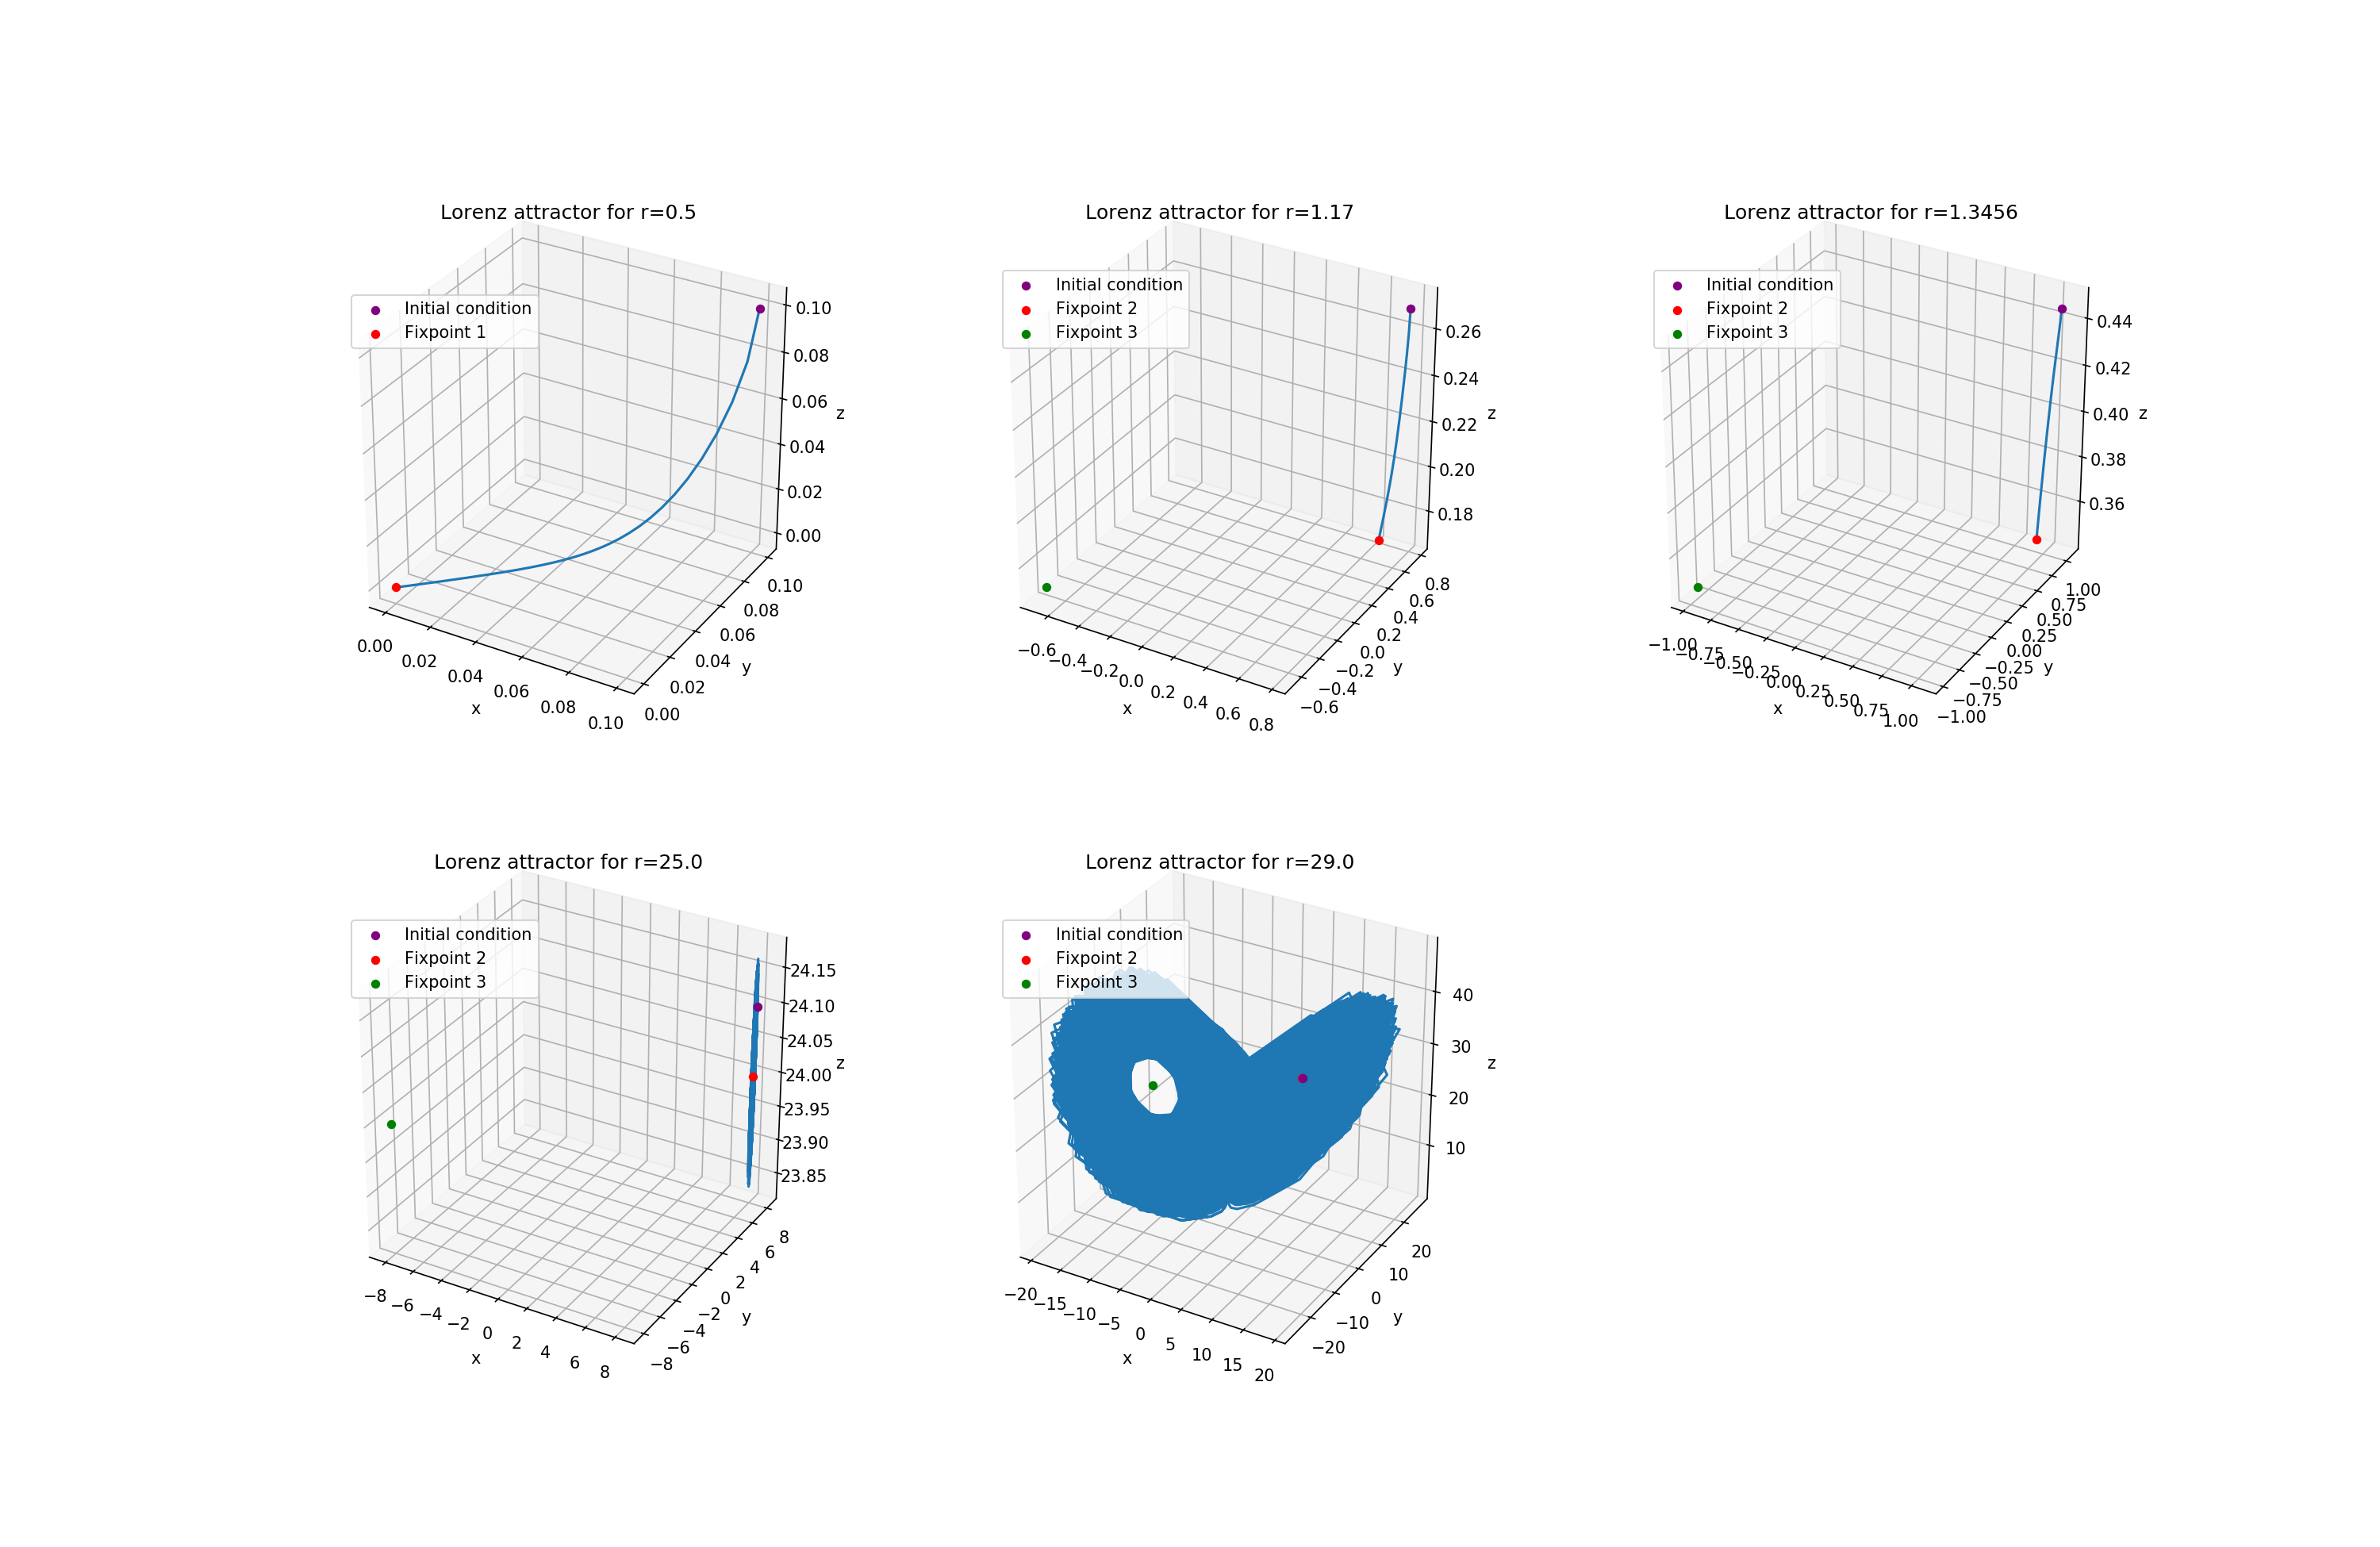

0.5
0
1.17
1
1.3456
2
25.0
3
29.0
4


In [19]:
fig = plt.figure(figsize=(20,13))
for n, r in enumerate(r_s):
    print(r)
    print(n)
    y0 = start(r)
    y, x = rk4(y0, np.array([0]), func, h, 100000, f_args={"r":r})
    
    ax = fig.add_subplot(2,3,n+1, projection='3d')
    ax.scatter(y0[0],y0[1],y0[2], label='Initial condition', c="purple")
    
    if r<1:
        ax.scatter(0,0,0, c='red', label='Fixpoint 1')
    if r>1:
        a0=np.sqrt(b*(r-1))
        ax.scatter(a0,a0,r-1, c='red', label='Fixpoint 2')
        ax.scatter(-a0,-a0,r-1, c='green', label='Fixpoint 3')
    
    ax.plot(y[:,0],y[:,1],y[:,2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(f"Lorenz attractor for r={r}")
    plt.legend(loc=(0.1,0.7))



So the first case is r = 0.5 < 1. As stated on the homework sheet we looked at the fixed point (0,0,0).  
As discussed in the lecture, this is the only (real) fixed point. It is a stable one as one can see since the curve stays at (0,0,0) after it has reached that point.  
(Notice that the curve starts at the purple dot).  
  
The second case is r = 1.17 > 1. So we're looking at the other fixed points. These are to be found at $C_{\pm} = \Big(\pm\sqrt{b(r-1)},\pm\sqrt{b(r-1)},r-1\Big) \approx \Big(\pm 0.6733, \pm 0.6733, 0.17\Big)$  
As one can see we checked for the positive fixed point. This is a stable point since a small pertubation also leads to the curve staying at the fixed point once it's reached, just as in the fist case.  
  
Thirdly, for r = 1.3456 we don't see a drastic change of behaviour. The fixed point is still stable (but a bit different from the point as before due to different values of r).  
  
For r = 25 we firstly see a change of behaviour. The fixed point is no longer a stable one. To check if this correlates with our expectations it is usefull to calculate the critical value of r:  
$$ r_{crit} = \frac{\sigma(3+b+\sigma)}{\sigma-b-a} \approx 24.73$$  
So we just passed the critical value for r, thus an unstable result is expected.  
  
In the last case we're looking at a value of r that's even bigger than before. Just as before we have two unstable fixed points. The curve "oscillates" or rotates around these two points, switching them and not reaching a stable point.